# EDA-2. Математическая статистика в контексте EDA

In [22]:
import pandas as pd
import statistics

In [23]:
df_wine = pd.read_csv('data/wine_cleared.csv')

In [24]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


Задание 2.1
Вычислите наименьший балл за вино в датасете.

In [25]:
df_wine['points'].min()

80

Задание 2.2
Вычислите наименьшую цену за бутылку в наборе данных.

In [26]:
df_wine['price'].min()

4.0

Задание 2.3
Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. Округлите значение до сотых.

In [27]:
round(statistics.mean(df_wine['price']),2)

35.36

In [28]:
df_wine['price'].mean()

35.363389129985535

Задание 2.5
Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics. Округлите значение до сотых.

In [29]:
round(statistics.median(df_wine['price']),2)

28.0

Задание 2.6
Вычислите медиану стоимости бутылки вина при помощи стандартных функций Python.

In [30]:
df_wine['price'].median()

28.0

Задание 2.7
Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics. Округлите значение до сотых.

In [31]:
round(statistics.mode(df_wine['price']),2)

35.36

In [32]:
df_wine['price'].mode()

0    35.363389
Name: price, dtype: float64

# 2. Создание признаков

In [33]:
df_wine['price_round'] = df_wine['price'].round().astype('int')
df_wine['price_round']

0         35
1         15
2         14
3         13
4         65
          ..
129966    28
129967    75
129968    30
129969    32
129970    21
Name: price_round, Length: 129971, dtype: int32

In [34]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
df_wine['year'] = df_wine['title'].str.findall(regex).str.get(0)

In [35]:
import seaborn as sns

<AxesSubplot:xlabel='year', ylabel='Count'>

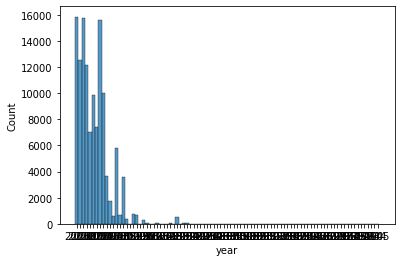

In [36]:
sns.histplot(df_wine['year'])

In [37]:
df_wine['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [38]:
df_wine['is_usa'] = df_wine['country'].apply(lambda x: 1 if x == 'US' else 0)
df_wine['is_france'] = df_wine['country'].apply(lambda x: 1 if x == 'France' else 0)
df_wine['is_italy'] = df_wine['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [39]:
df_wine['is_france'].sum()

22093

In [40]:
df_wine['is_italy'].sum()

19540

In [41]:
df_wine['year'] = pd.to_datetime(df_wine['year'], errors='coerce')

In [42]:
df_wine['old_wine'] = df_wine['year'].apply(lambda x: 1 if x.year < 2010 else 0)

In [43]:
df_wine['old_wine'].sum()

39765

Задание 2.7 (Самопроверка)
Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

In [44]:
regex = '(?<=\().+?(?=\))' # регулярное выражение для нахождения чисел
df_wine['locality'] = df_wine['title'].str.findall(regex).str.get(0)

In [45]:
import re

In [46]:
s="(a(SAP){}]"
brackets=re.search(r"(?<=\().+?(?=\))",s)
brackets.group()

'a(SAP'

In [47]:
df_wine['locality'].value_counts()

Napa Valley                          4478
Columbia Valley (WA                  4124
Russian River Valley                 3091
California                           2629
Paso Robles                          2350
                                     ... 
Finca Élez                              1
Valpolicella Valpantena Superiore       1
Moscato di Pantelleria                  1
Paardeberg                              1
Paestum                                 1
Name: locality, Length: 1562, dtype: int64

# <center>3. Создание признаков. Внешние источники данных</center>

In [48]:
country_population = pd.read_csv('data\country_population.csv', sep=';')
country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


Задание 3.1
Каково население Италии согласно датасету country_population? Ответ вводите без пробелов и запятых.

In [49]:
country_population[country_population['country'] == 'Italy']['population']

24    59,097,904
Name: population, dtype: object

In [50]:
df_wine = df_wine.join(country_population.set_index('country'), on='country')

In [51]:
country_area = pd.read_csv('data\country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


Задание 3.2
Создайте новый признак <b>area_country</b> — площадь страны, аналогичный признаку country_population.
Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.

In [52]:
df_wine = df_wine.join(country_area.set_index('country'), on='country')

In [53]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  obje

In [54]:
df_wine[df_wine['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area']

94    9372610.0
Name: area, dtype: float64

## 4. Создание признаков. Работа с форматом «дата-время»

In [55]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [56]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   client_id   10 non-null     int64         
 1   agent_date  10 non-null     datetime64[ns]
 2   created_at  10 non-null     datetime64[ns]
 3   end_date    10 non-null     datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 448.0 bytes


In [57]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [58]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

In [59]:
is_connection

NameError: name 'is_connection' is not defined

In [ ]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

In [ ]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [ ]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [ ]:
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


### <center>Задание 4.5</center>
Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

In [61]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  obje

In [79]:
df_wine['years_diff'] = (pd.to_datetime('12.01.2022', dayfirst=True) - df_wine['year']).dt.days

In [80]:
df_wine[['year','years_diff']]

,year,years_diff
0,2013-01-01,3298.0
1,2011-01-01,4029.0
2,2013-01-01,3298.0
3,2013-01-01,3298.0
4,2012-01-01,3664.0
...,...,...
129966,2013-01-01,3298.0
129967,2004-01-01,6586.0
129968,2013-01-01,3298.0
129969,2012-01-01,3664.0


In [81]:
round(df_wine['years_diff'].max())

98627

### 5. Кодирование признаков. Методы

In [85]:
import category_encoders as ce

In [92]:
df_wine['year'].value_counts()

2013-01-01    15853
2012-01-01    15723
2014-01-01    15568
2011-01-01    12531
2010-01-01    12149
              ...  
1973-01-01        1
1935-01-01        1
1967-01-01        1
1969-01-01        1
1945-01-01        1
Name: year, Length: 82, dtype: int64

In [89]:
df_wine['year'] = df_wine['year'].astype('str')

In [94]:
df_wine['year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 129972 entries, 0 to 129970
Series name: year
Non-Null Count   Dtype 
--------------   ----- 
129972 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [96]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(df_wine['year'])
data_bin

,year
0,1
1,2
2,1
3,1
4,3
...,...
129966,1
129967,12
129968,1
129969,3


Задание 5.4

В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

In [100]:
df_wine['taster_name'].value_counts().shape

(20,)

Задание 5.5

Закодируйте признак country двоичным способом.
Сколько новых признаков образовалось после кодирования признака country?

In [102]:
df_wine['country']

(43,)

In [103]:
bin_encoder = ce.BinaryEncoder(cols=['country'])
country_bin = bin_encoder.fit_transform(df_wine['country'])
country_bin

,country_0,country_1,country_2,country_3,country_4,country_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,0,1,1
4,0,0,0,0,1,1
...,...,...,...,...,...,...
129966,0,0,0,1,1,0
129967,0,0,0,0,1,1
129968,0,0,0,1,0,1
129969,0,0,0,1,0,1


In [106]:
df_wine['taster_twitter_handle'].value_counts()

unknown             31213
@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1006
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

Задание 5.8

На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.

In [107]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
country_bin = bin_encoder.fit_transform(df_wine['taster_twitter_handle'])
country_bin

,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,0,1,1
...,...,...,...,...,...
129966,0,0,1,0,0
129967,0,0,0,1,1
129968,0,0,0,1,0
129969,0,0,0,1,0


Задание 5.9 (Самопроверка)

In [108]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product       3 non-null      object
 1   price         3 non-null      int64 
 2   payment_type  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [110]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(df['product'])
product = pd.concat([df, data_bin], axis=1)
encoder = ce.OneHotEncoder(cols=['payment_type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df['payment_type'])
card_type = pd.concat([df, type_bin], axis=1)

,product,price,payment_type,product
0,Product1,1200,Mastercard,1
1,Product2,3600,Visa,2
2,Product3,7500,Amex,3


In [111]:
encoder = ce.OneHotEncoder(cols=['payment_type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df['payment_type'])
card_type = pd.concat([df, type_bin], axis=1)

card_type

,product,price,payment_type,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0
1,Product2,3600,Visa,0,1,0
2,Product3,7500,Amex,0,0,1


Задание 6.4

Нормализуйте признак price. Используйте подходящий тип нормализации.

В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

In [115]:
import matplotlib.pyplot as plt

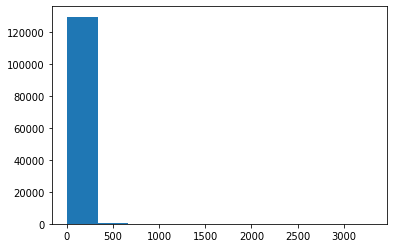

In [116]:
plt.hist(df_wine['price'])
plt.show()

In [118]:
from sklearn import preprocessing

In [122]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129972 non-null  int64  
 1   country                129909 non-null  object 
 2   description            129972 non-null  object 
 3   designation            129972 non-null  object 
 4   points                 129972 non-null  int64  
 5   price                  129972 non-null  float64
 6   province               129909 non-null  object 
 7   region_1               129972 non-null  object 
 8   taster_name            129972 non-null  object 
 9   taster_twitter_handle  129972 non-null  object 
 10  title                  129972 non-null  object 
 11  variety                129971 non-null  object 
 12  winery                 129972 non-null  object 
 13  price_round            129972 non-null  int32  
 14  year                   129972 non-nu

In [151]:
# копируем исходный датасет
df_wine = pd.read_csv('data/wine_cleared.csv')
df = df_wine.copy()
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
df['price'] = r_scaler.fit_transform(df[['price','points']])

In [152]:
df['price']

0         0.334700
1        -0.590909
2        -0.636364
3        -0.681818
4         1.681818
            ...   
129966    0.000000
129967    2.136364
129968    0.090909
129969    0.181818
129970   -0.318182
Name: price, Length: 129971, dtype: float64

In [153]:
round(df['price'].sum())

43501

Задание 6.5

Стандартизируйте исходный признак price.

В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

In [155]:
s_scaler = preprocessing.StandardScaler()
df['price'] = s_scaler.fit_transform(df[['price','points']])

In [157]:
round(df['price'][129968],2)

-0.14